Define basic functions

In [233]:
import numpy as np
import matplotlib.pyplot as plt

# sigmoid(z) = 1 \ 1 + e^-z
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# E (y,  y_hat) = -y ln(y_hat) - (1-y) ln(1-y_hat)
def CEE(y_predicted, y):
  if y == 1:
    return -1 * np.log(y_predicted)
  else:
    return -1 * np.log(1 - y_predicted)

# dsig(z) / dz = sig(z)(1 - sig(z))
def dsigmoid(z):
  return z * (1 - z)

# dE / dy_predicted = -(y / y_predictes) + ((1-y) / (1 - y_predicted))
def dCEE(y_predicted, y):
  if y == 1:
    return -1 / y_predicted
  else:
    return 1 / (1 - y_predicted)

Plot XNOR

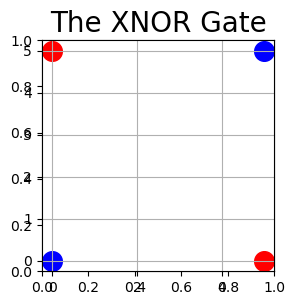

In [234]:
# dataset
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 0, 0, 1])
# Plot
fig = plt.figure(figsize=(3, 3))
plt.title('The XNOR Gate', fontsize=20)
ax = fig.add_subplot(111)
# red: class 0, blue: class 1.
ax.scatter(0, 0, s=200, c='b', label="Class 1")
ax.scatter(0, 5, s=200, c='r', label="Class 0")
ax.scatter(5, 0, s=200, c='r', label="Class 0")
ax.scatter(5, 5, s=200, c='b', label="Class 1")
plt.grid()
plt.show()
     

 Creating a three layers NN by using mathematical 'numpy' library
 Using methods from the library to operate with matrices
 Importing 'matplotlib' library to plot experimental results in form of figures
 Importing 'numpy' library

In [235]:

import numpy as np
import matplotlib.pyplot as plt



class NeuralNetwork():
    def __init__(self):

        np.random.seed(1)

      
        self.weights_0_1 = 2 * np.random.random((3, 4)) - 1
        self.weights_1_2 = 2 * np.random.random((4, 1)) - 1

    
        self.layer_2 = np.array([])

   
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def derivative_of_sigmoid(self, x):
        return x * (1 - x)
    

    def run_nn(self, set_of_inputs):
       
        layer_0 = set_of_inputs  
        layer_1 = self.sigmoid(np.dot(layer_0, self.weights_0_1)) 
        layer_2 = self.sigmoid(np.dot(layer_1, self.weights_1_2))  
        return layer_2

 
    def training_process(self, set_of_inputs_for_training, set_of_outputs_for_training, epochs):
    
        errors = []
        for i in range(epochs):
       
            layer_0 = set_of_inputs_for_training 
            layer_1 = self.sigmoid(np.dot(layer_0, self.weights_0_1)) 
            self.layer_2 = self.sigmoid(np.dot(layer_1, self.weights_1_2))  

        
            layer_2_error = set_of_outputs_for_training - self.layer_2
            
            errors.append(np.mean(np.abs(layer_2_error)))
     
            if (i % 500) == 0:
                print('Final error after', i, 'epoch =', np.mean(np.abs(layer_2_error)))


            # Calculating delta for output layer (Layer 2)
            # Using sign '*' instead of function 'dot' of numpy library
    

            delta_2 = layer_2_error * self.derivative_of_sigmoid(self.layer_2)

            # Calculating an error for hidden layer (Layer 1)
            # Multiplying delta_2 by weights between hidden layer and output layer
           
            layer_1_error = np.dot(delta_2, self.weights_1_2.T)

            # Calculating delta for hidden layer (Layer 1)
            delta_1 = layer_1_error * self.derivative_of_sigmoid(layer_1)

            # Implementing corrections of weights
            self.weights_1_2 += np.dot(layer_1.T, delta_2)
            self.weights_0_1 += np.dot(layer_0.T, delta_1)
            
        return errors



 Create matrix 1x4 and transpose it to matrix 4x1 at the same time
 Creating three layers NN by initializing of instance of the class
 Starting the training process with data above and number of repetitions of 5000
 Showing the output results after training
 After training process was finished and weights are adjusted we can test NN

Final error after 0 epoch = 0.5035899680972746
Final error after 500 epoch = 0.11276292277178596
Final error after 1000 epoch = 0.04919636361412779
Final error after 1500 epoch = 0.03532123858452277
Final error after 2000 epoch = 0.028683045919303228
Final error after 2500 epoch = 0.024637702262591363
Final error after 3000 epoch = 0.021853643867947945
Final error after 3500 epoch = 0.019791311427645494
Final error after 4000 epoch = 0.018186317007655432
Final error after 4500 epoch = 0.016892254711503706

Output results after training:
[[0.98519849]
 [0.01661128]
 [0.986557  ]
 [0.01843516]]

Output result for testing data =  [0.01072646]


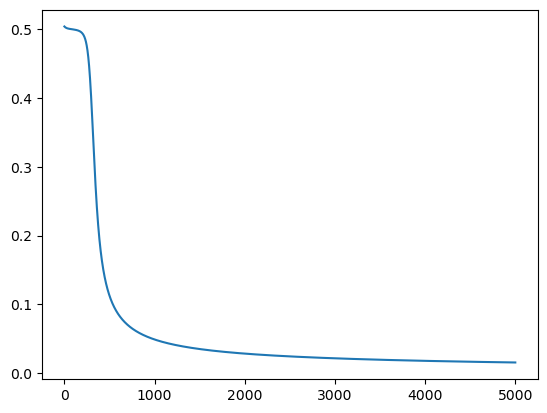

In [236]:
input_set_for_training = np.array([[1, 1, 1], [1, 0, 1], [0, 0, 1], [0, 1, 1]])

output_set_for_training = np.array([[1, 0, 1, 0]]).T


nn = NeuralNetwork()



errors = nn.training_process(input_set_for_training, output_set_for_training, 5000)


print()
print('Output results after training:')
print(nn.layer_2)
print()



print('Output result for testing data = ', nn.run_nn(np.array([1, 0, 0])))






# fig = plt.figure()
plt.plot(errors)

 Using 'seed' for the random generator
 Modeling three layers Neural Network

        Input layer (Layer 0) has three parameters  Hidden layer (Layer 1) has four neurons   Output layer (Layer 2) has one neuron

        Initializing weights between input and hidden layers
        The values of the weights are in range from -1 to 1

        
            We receive matrix 3x4 of weights (3 inputs in Layer 0 and 4 neurons in Layer 1)

       Initializing weights between hidden and output layers
       The values of the weights are in range from -1 to 1

       
            We receive matrix 4x1 of weights (4 neurons in Layer 1 and 1 neuron in Layer 2)

Creating a variable for storing matrix with output results
    

In [237]:
class NeuralNetwork():
    def __init__(self):
        np.random.seed(1)

        
        self.weights_0_1 = 2 * np.random.random((3, 4)) - 1
        self.weights_1_2 = 2 * np.random.random((4, 1)) - 1

        
        self.layer_2 = np.array([])

   Creating function for normalizing weights and other results by Sigmoid curve
    Creating function for calculating a derivative of Sigmoid function (gradient of Sigmoid curve)
    Which is going to be used for back propagation - correction of the weights
    This derivative shows how good is the current weights

In [238]:
 
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

 
    def derivative_of_sigmoid(self, x):
        return x * (1 - x)

  Creating function for running and testing NN after training
       Feed forward through three layers in NN
         Results are returned in normalized form in appropriate dimensions

In [239]:
    def run_nn(self, set_of_inputs):
   
        layer_0 = set_of_inputs  
        layer_1 = self.sigmoid(np.dot(layer_0, self.weights_0_1))  
        layer_2 = self.sigmoid(np.dot(layer_1, self.weights_1_2))  
        return layer_2

             Feeding our NN with training set and calculating output
             Feed forward through three layers in NN
             With 'numpy' library and function 'dot' we multiply matrices with values in layers to appropriate weights
             Results are returned in normalized form in appropriate dimensions
             Creating function for training the NN
             Using Backpropagation for calculating values to correct weights
             Calculating an error for output layer (Layer 2) which is the difference between desired output and obtained output
             We subtract matrix 4x1 of received outputs from matrix 4x1 of desired outputs

In [240]:
    def training_process(self, set_of_inputs_for_training, set_of_outputs_for_training, epochs):
        errors = []
        for i in range(epochs):

            layer_0 = set_of_inputs_for_training  
            layer_1 = self.sigmoid(np.dot(layer_0, self.weights_0_1))  
            self.layer_2 = self.sigmoid(np.dot(layer_1, self.weights_1_2)) 

            layer_2_error = set_of_outputs_for_training - self.layer_2
            
            errors.append(np.mean(np.abs(layer_2_error)))

      Showing the error each 500 iterations to track the improvements

In [241]:
        if (i % 500) == 0:
                print('Final error after', i, 'epoch =', np.mean(np.abs(layer_2_error)))

Calculating delta for output layer (Layer 2)
            Using sign '*' instead of function 'dot' of numpy library
            In this way matrix 4x1 will be multiplied by matrix 4x1 element by element

Calculating an error for hidden layer (Layer 1)
            Multiplying delta_2 by weights between hidden layer and output layer
            Shows us how much hidden layer (Layer 1) influences on to the layer_2_error


            Calculating delta for hidden layer (Layer 1)
            Implementing corrections of weights